In [18]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.axes
%matplotlib inline

In [20]:
Data = pd.read_csv('FinalData.csv')
Y = Data.Y

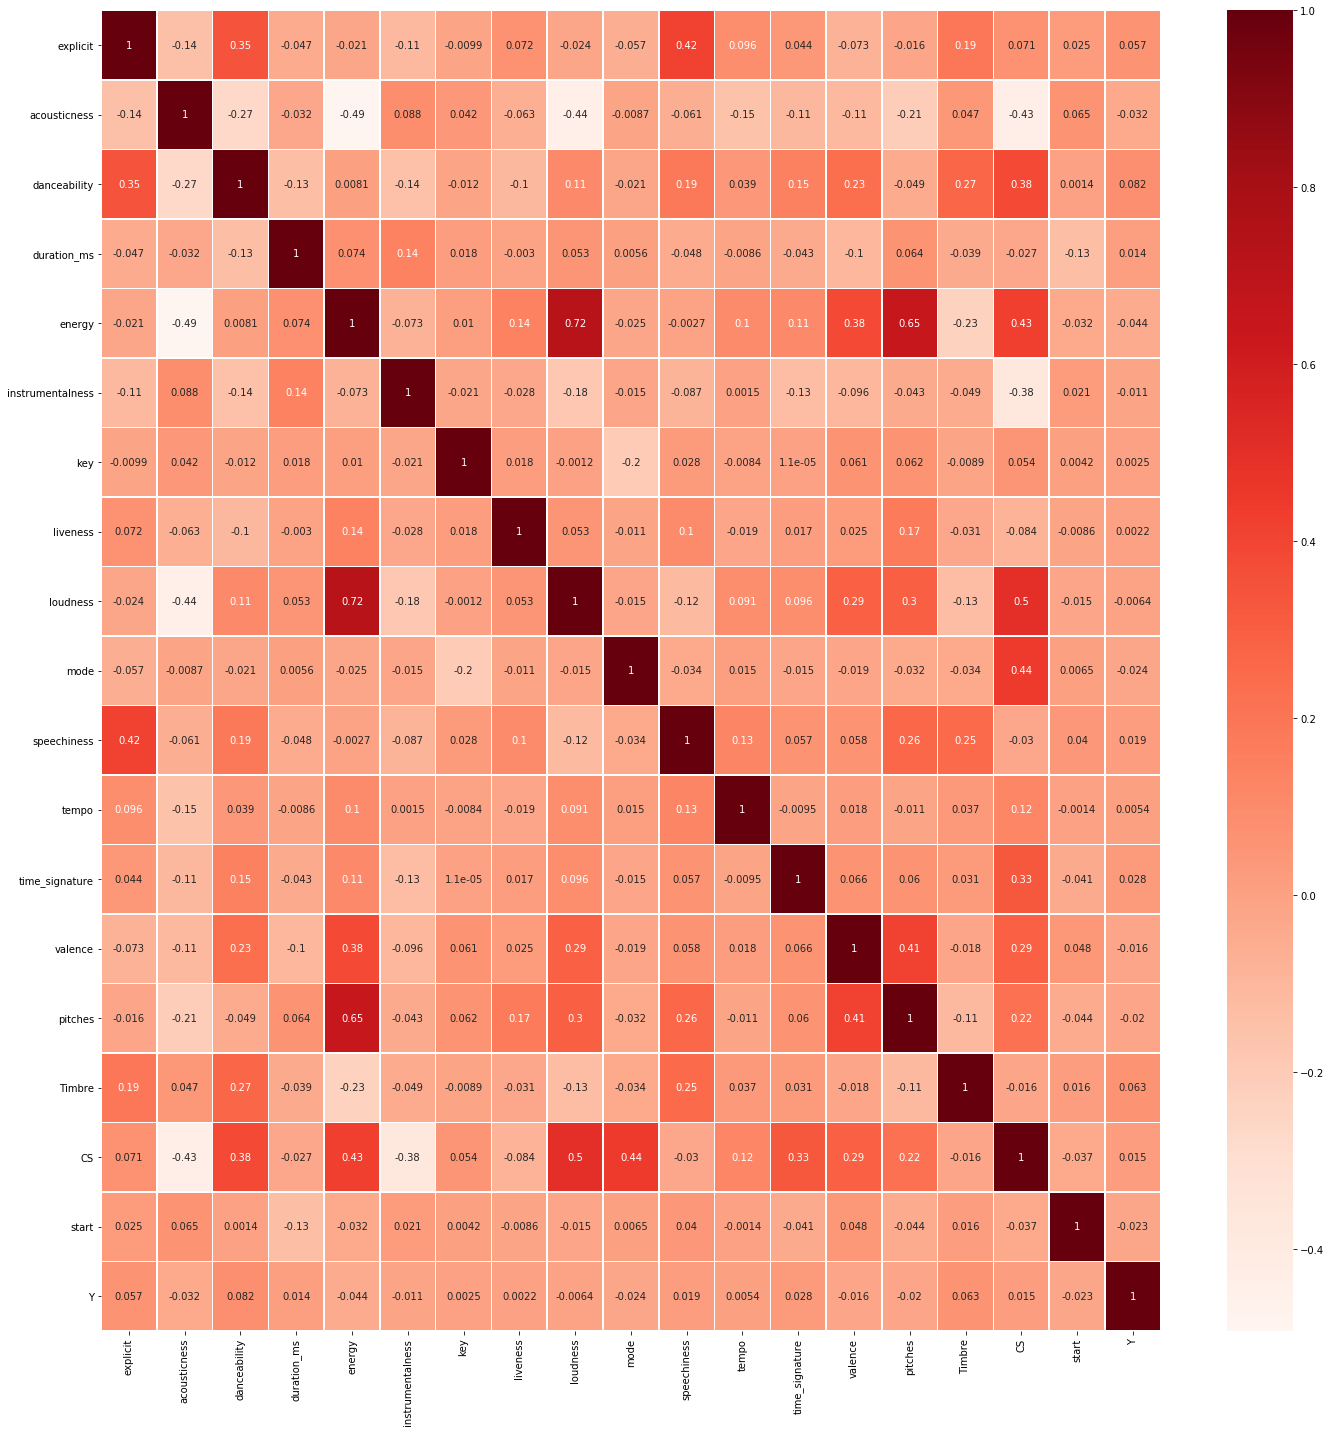

In [21]:
fig1 = plt.figure(num=1, figsize=(20, 20))
cor = Data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, linewidths=0.5)
plt.savefig('HeatMap.png')
plt.tight_layout()
plt.show()

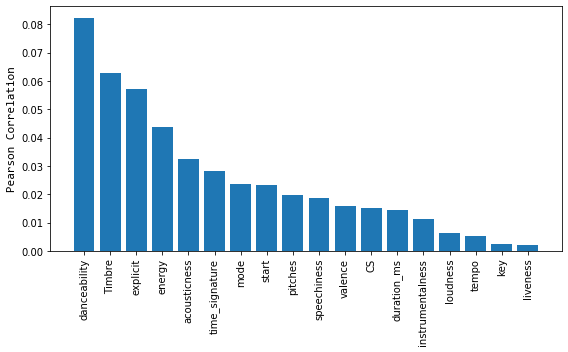

In [22]:
PCA = cor['Y'].apply(np.abs).sort_values(ascending=False).drop(['Y'], axis=0)
fig2 = plt.figure(num=2, figsize=(8, 5))
plt.bar(x=PCA.index, height=PCA)
plt.xticks(rotation=90)
plt.ylabel("Pearson Correlation", fontname="Consolas", fontsize=12)
plt.tight_layout()
plt.savefig('Feature Correlation.png')

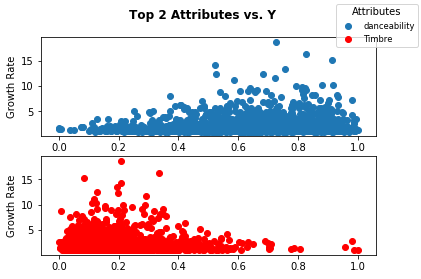

In [5]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Top 2 Attributes vs. Y', fontweight="bold")
PCA1 = Data.danceability
PCA2 = Data.Timbre
ax1.scatter(PCA1, Y, label=PCA.index[0])
ax1.set(ylabel="Growth Rate")
ax2.scatter(PCA2, Y, c='r', label=PCA.index[1])
ax2.set(ylabel="Growth Rate")
fig.legend(loc='upper right', fontsize='small', title='Attributes', fancybox=True)
plt.savefig('Top2Attributes_Full.png')
plt.show()

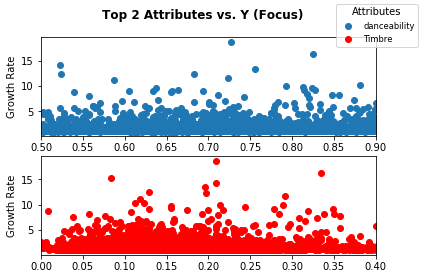

In [6]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle("Top 2 Attributes vs. Y (Focus)", fontweight="bold")
PCA1 = Data.danceability
PCA2 = Data.Timbre
ax1.scatter(PCA1, Y, label=PCA.index[0])
ax1.set(ylabel="Growth Rate")
ax1.set_xlim(0.5, 0.9)
ax2.scatter(PCA2, Y, c='r', label=PCA.index[1])
ax2.set_xlim(0.0, 0.4)
ax2.set(ylabel="Growth Rate")
fig.legend(loc='upper right', fontsize='small', title='Attributes', fancybox=True)
plt.savefig('Top2Attributes_Zoom.png')
plt.show()

In [7]:
Data['Y2'] = np.where(Data.Y >= 4, 1, 0)
Y2 = Data.Y2

In [8]:
vc = Y2.value_counts()
ratio = vc[1]/sum(vc)
print("% of 1's in the predicted column Y:", round(ratio*100,2))

% of 1's in the predicted column Y: 4.99


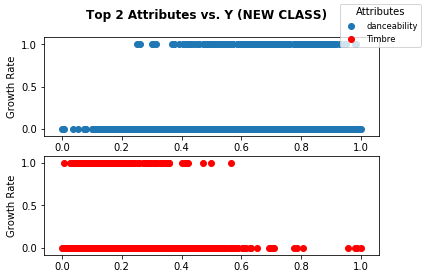

In [24]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Top 2 Attributes vs. Y (NEW CLASS)', fontweight="bold")
PCA1 = Data.danceability
PCA2 = Data.Timbre
ax1.scatter(PCA1, Y2, label=PCA.index[0])
ax1.set(ylabel="Growth Rate")
ax2.scatter(PCA2, Y2, c='r', label=PCA.index[1])
ax2.set(ylabel="Growth Rate")
fig.legend(loc='upper right', fontsize='small', title='Attributes', fancybox=True)
plt.savefig('Top2Attributes_NewClass_Full.png')
plt.show()

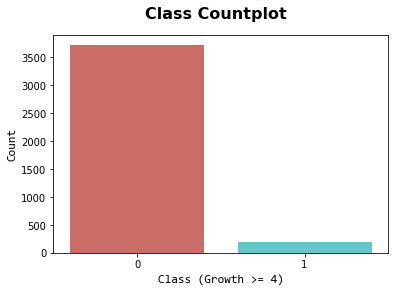

In [9]:
fig3 = plt.figure(num=3, figsize=(6, 4))
fig3.suptitle("Class Countplot", fontweight="bold", fontsize=16)
sns.countplot(x = 'Y2', data = Data, palette='hls')
plt.ylabel("Count", fontname="Consolas", fontsize=12)
plt.xlabel("Class (Growth >= 4)", fontname="Consolas", fontsize=12)
plt.savefig('Class Plot.png')